In [1]:
# import stuff
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np

In [2]:
# creating file paths to csv files
mouse_file = os.path.join('data','Mouse_metadata.csv')
study_file = os.path.join('data','Study_results.csv')
#creating dataframes for each file
mouse_df = pd.read_csv(mouse_file)
study_results_df = pd.read_csv(study_file)
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# creating (inner) merged data frame using Mouse ID common thing 
mice_study = mouse_df.merge(study_results_df, on='Mouse ID', how='inner')
mice_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
mice_study['Mouse ID'].nunique()

249

### Cleaning Data

In [6]:
# get mouse id for duplicate time points
mouse_bool = mice_study[['Mouse ID','Timepoint']].duplicated()
mouse_bool.head()
mouse_id = [mice_study['Mouse ID'][cheese] for cheese in range(0,len(mouse_bool)) if (mouse_bool[cheese] == True)]
mouse_id

['g989', 'g989', 'g989', 'g989', 'g989']

In [7]:
#look at that. there are a bunch of repeated values in there.
mice_study.loc[mice_study['Mouse ID'] == 'g989', :].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [8]:
# dropping dirty mouse
clean_mice = mice_study.loc[mice_study['Mouse ID'] != 'g989', :]
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# there is one less mouse
clean_mice.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [10]:
clean_mice.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [11]:
clean_mice.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary Statistics

In [12]:
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# making groupby object on drug regimen
drug_group = clean_mice.groupby('Drug Regimen')
drug_group

looking at tumor size by drug regimen

In [14]:
# finding mean (Mean Tumor Volum (mm3))
drug_mean = drug_group['Tumor Volume (mm3)'].mean()
drug_mean.head(3)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# finding median (Median Tumor Volume (mm3))
drug_median = drug_group['Tumor Volume (mm3)'].median()
drug_median.head(3)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# finding variance (Variance of Tumor Volume (mm6))
drug_var = drug_group['Tumor Volume (mm3)'].var()
drug_var.head(3)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# finding standard deviation (Std. Dev. of Tumor Volume (mm3))
drug_std = drug_group['Tumor Volume (mm3)'].std()
drug_std.head(3)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# finding SEM (SEM of Tumor Volume (mm3))
drug_sem = drug_group['Tumor Volume (mm3)'].sem()
drug_sem.head(3)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# getting index
drug_index = drug_group['Drug Regimen'].unique()
drug_index = pd.Series(drug_index)
drug_index = drug_index.str[0]

In [20]:
# making summary table of statistics
drug_stats_dict = {
    'Mean Tumor Volum (mm3)': drug_mean,
    'Median Tumor Volume (mm3)': drug_median,
    'Variance of Tumor Volume (mm6)': drug_var,
    'Std. Dev. of Tumor Volume (mm3)': drug_std,
    'SEM of Tumor Volume (mm3)': drug_sem
}

# make statistical summary table
drug_stats = pd.DataFrame(drug_stats_dict, index=drug_index)
drug_stats

,Mean Tumor Volum (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm6),Std. Dev. of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


i am interested to see if going back later and only looking at the last time point for each mouse would decrease the the std. deviation and sem, because the drugs are suppose to decrease the size of tumors over time so by looking at whole data set we are introducing a lot of error. and seems just like the wrong way to do it.

### same thing with aggregate functionality

In [21]:
agg_drug_stats = drug_group['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
agg_drug_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


awesome how it does the same thing. with a few more lines i could even change column titles to make it exactly identical.

# Bars and Pie Charts

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_meas = drug_group['Timepoint'].count()
num_meas.head(3)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Name: Timepoint, dtype: int64

In [23]:
x_axis = np.arange(len(drug_index))
tick_location = [value for value in x_axis]

In [24]:
# this should help with my list object not callable typeerror
drug_array = drug_index.to_numpy()
drug_array

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

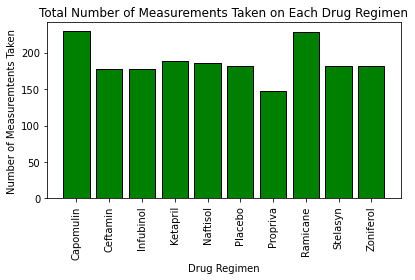

In [30]:
# plotting count of total measurments for each drug regiment
plt.bar(x_axis, num_meas, color='g', edgecolor='black')
plt.xticks(tick_location, drug_array, rotation=90)
plt.title('Total Number of Measurements Taken on Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measuremtents Taken')
plt.tight_layout()
plt.show()